## Void growth and resin transport during processing of thermosetting—Matrix composites
J. Kardos, M. Duduković and R. Dave

Epoxy resins and composites IV 1986 Pages 101-123

https://link.springer.com/chapter/10.1007/3-540-16423-5_13

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
RH = 0.5 # initial relative humidity: humidity at which the prepreg was equilibrated
C_infty = 2.13/(10**6) * RH**2 # [g/cc]
p0 = 0.1 # [atm]
T0 = 298 # [K]
d_B0 = 0.1 # [cm]
rho_R = 1.22 # [g/cc]
M_H2O = 18.015 # [g/mol]
M_air = 28.96 # [g/mol]
R = 82.057 # [cc atm / K mol]
D0 = 0.105 # [cm^2/h]
EpR = 2817 # [K]

In [77]:
def simulate(d_B, p, T):
    """
    input : d_B (bubble diameter at time t-1)[cm], p (pressure profile in the resin),
            T (autoclave temperature)
    output : next_d_B (bubble diameter at time t)[cm]
    """ 
    # calculate C_sat
    y_air = 0#p0*T/(p*T0) * (d_B0/d_B)**3
    p_H2O = (1-y_air)*p # [atm]
    C_sat = 8.651/(10**14)*np.exp(9784/T)*p_H2O**2 # [g/cc]
    # calculate ϱ_g
    rho_g = ( (1-y_air)*(M_H2O*p) + y_air*(M_air*p) ) / (R*T) # [g/cc]
    # calculate D
    D = D0 * np.exp(-EpR/T)
    # calculate β
    beta = (C_infty - C_sat) / rho_g
    print(C_infty, C_sat, rho_g)
    next_d_B = np.sqrt(d_B**2 + 16*D/60*beta**2)
    return next_d_B

In [78]:
ds = []
d_B, p, T = 0.1, 0.1, 298
# stage 1
while (T < 408):
    d_B = simulate(d_B, p, T)
    ds.append(d_B)
    T += 2

2.13e-06 0.1570059146198045 7.367198427218664e-05
2.13e-06 0.1261412165471366 7.318083771037206e-05
2.13e-06 0.10163822611300626 7.269619640103185e-05
2.13e-06 0.08212801911722291 7.221793195102506e-05
2.13e-06 0.0665480951389837 7.174591932389418e-05
2.13e-06 0.05407124227876566 7.128003673088188e-05
2.13e-06 0.044051483737972 7.082016552616651e-05
2.13e-06 0.03598287285602637 7.036619010612699e-05
2.13e-06 0.029467983858756683 6.991799781245738e-05
2.13e-06 0.024193742581895453 6.947547883896081e-05
2.13e-06 0.019912831237709247 6.903852614186044e-05
2.13e-06 0.016429339202409493 6.86070353534738e-05
2.13e-06 0.013587657989984837 6.818090469910441e-05
2.13e-06 0.011263862321616974 6.776003491701117e-05
2.13e-06 0.009359001906904212 6.734432918132397e-05
2.13e-06 0.007793865929092897 6.693369302777932e-05
2.13e-06 0.006504885830420042 6.652803428215642e-05
2.13e-06 0.005440920359817847 6.612726299130006e-05
2.13e-06 0.004560726294387479 6.573129135662161e-05
2.13e-06 0.003830963473905

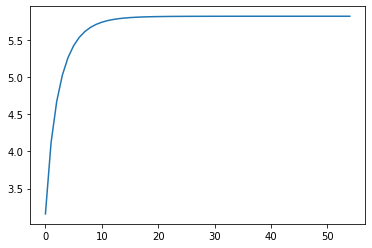

In [79]:
plt.plot(ds)